In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score 

from joblib import Parallel, delayed

# Load Data

In [2]:
lab_desktop = True
if lab_desktop : 
    data_path = '/home/INT/mifsud.l/Bureau/pattern_classification_git/results/'
    result_path = '/home/INT/mifsud.l/Bureau/pattern_classification_git/results/'
else : 
    data_path = '/home/laurie/Bureau/pattern_classification_git/results/' 
    result_path = '/home/laurie/Bureau/pattern_classification_git/results/'

In [3]:
target = pd.read_csv(data_path + 'target.csv')
spike_convolved = np.load(data_path +  'spike_convolved.npy')
n_trials, n_times, n_neurons = spike_convolved.shape

# Data exploration

In [50]:
mean_spike_convolved = spike_convolved.mean(axis=2)
targets = target.columns[1:3].to_list()
dfs = {}

for idx, tgt in enumerate(targets): 
    df = pd.DataFrame(mean_spike_convolved, index=target[f'{tgt}'])
    df_melted = df.melt(value_vars=np.arange(n_times), value_name='fr', ignore_index=False).reset_index()
    dfs[f'{tgt}'] = df_melted

dfs

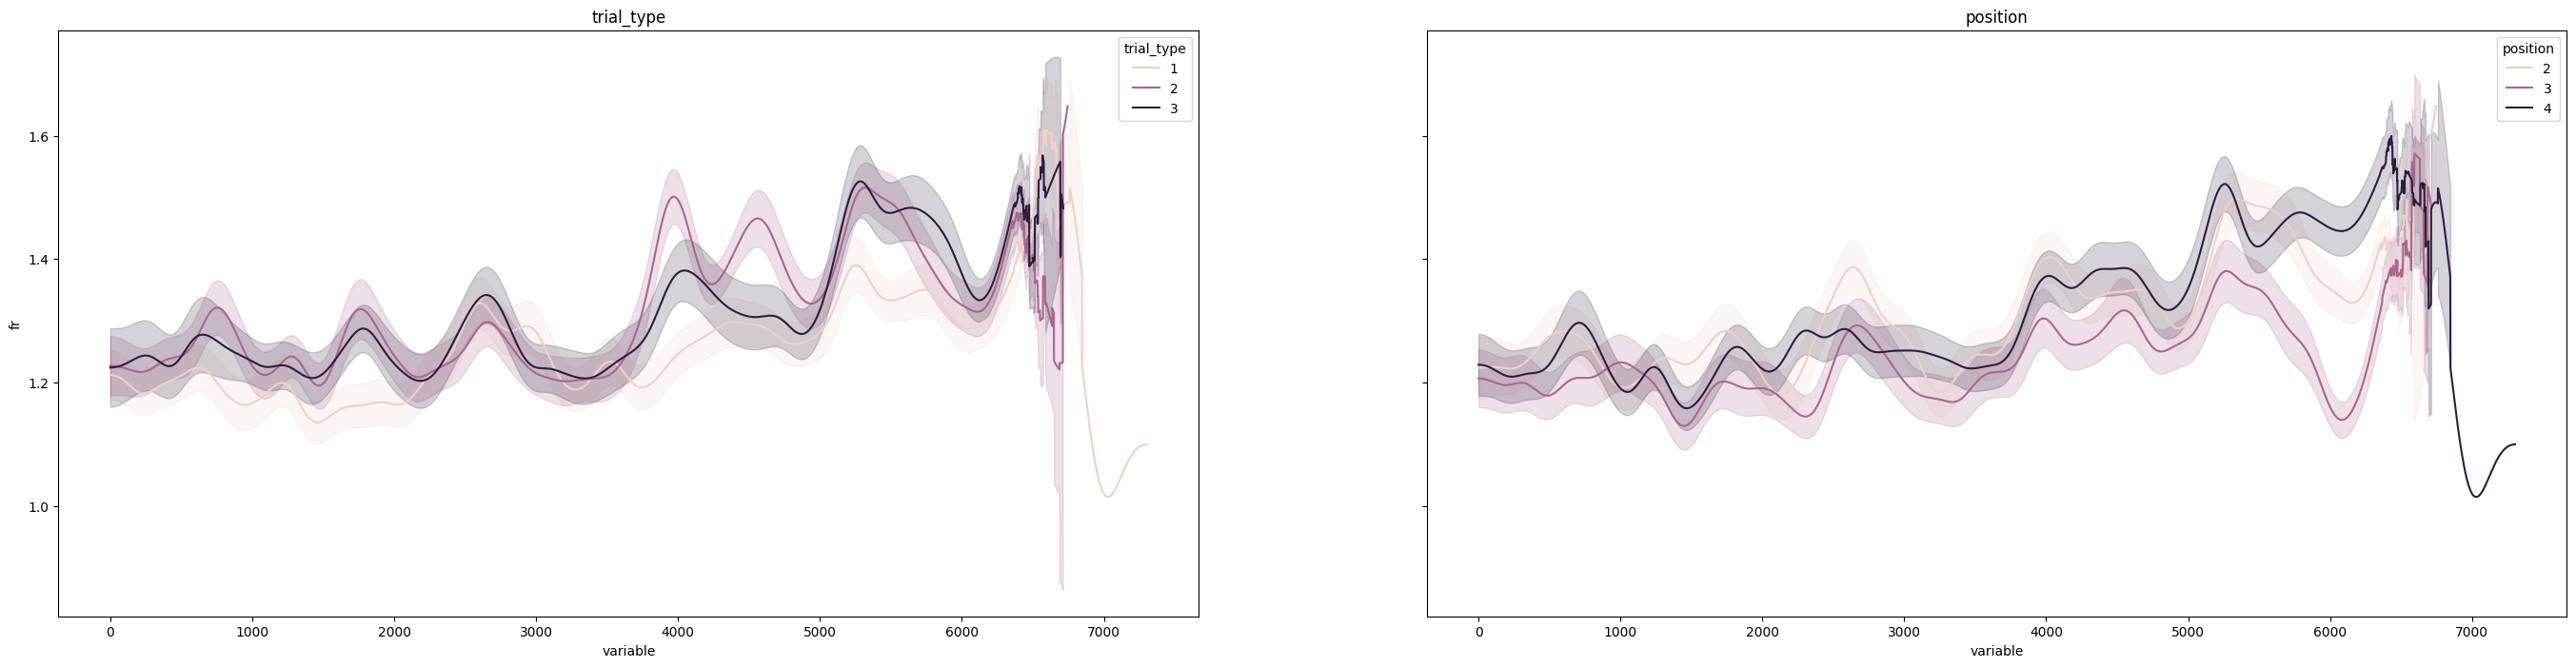

In [55]:
fig, axs = plt.subplots(1,2, figsize=(34,8), sharex=True, sharey=True)
axs = np.ravel(axs)
for idx, tgt in enumerate(targets): 
    plt.sca(axs[idx])
    plt.title(f'{tgt}')
    sns.lineplot(
    data=dfs[f'{tgt}'], 
    x='variable', 
    y='fr', 
    hue = f'{tgt}',
    errorbar='se'
)


In [116]:
df = dfs['trial_type']

In [117]:
df

trial_type  variable        fr
0                 1         0  1.672784
1                 1         0  1.173863
2                 1         0  1.607364
3                 1         0  1.597866
4                 1         0  1.612339
...             ...       ...       ...
1285499           1      7303       NaN
1285500           2      7303       NaN
1285501           2      7303       NaN
1285502           2      7303       NaN
1285503           2      7303       NaN

[1285504 rows x 3 columns]

In [123]:
# Function to add 'Trials' column
def add_trials_column(df):
    df['Trials'] = ''
    
    for trial_type, group in df.groupby('variable'):
        print(trial_type, group)
        n = len(group)
        split_index = n // 2
        df.loc[group.index[:split_index], 'Trials'] = 'early'
        df.loc[group.index[split_index:], 'Trials'] = 'late'
    
    return df

In [124]:
df = add_trials_column(df)

0      trial_type  variable        fr Trials
0             1         0  1.672784       
1             1         0  1.173863       
2             1         0  1.607364       
3             1         0  1.597866       
4             1         0  1.612339       
..          ...       ...       ...    ...
171           1         0  0.823952       
172           2         0  0.681224       
173           2         0  0.633411       
174           2         0  0.799330       
175           2         0  0.616786       

[176 rows x 4 columns]
1      trial_type  variable        fr Trials
176           1         1  1.672774       
177           1         1  1.173925       
178           1         1  1.607371       
179           1         1  1.597904       
180           1         1  1.612319       
..          ...       ...       ...    ...
347           1         1  0.823959       
348           2         1  0.681230       
349           2         1  0.633415       
350           2         1 

In [120]:
df

trial_type  variable        fr Trials
0                 1         0  1.672784  early
1                 1         0  1.173863  early
2                 1         0  1.607364  early
3                 1         0  1.597866  early
4                 1         0  1.612339  early
...             ...       ...       ...    ...
1285499           1      7303       NaN   late
1285500           2      7303       NaN   late
1285501           2      7303       NaN   late
1285502           2      7303       NaN   late
1285503           2      7303       NaN   late

[1285504 rows x 4 columns]

In [100]:
import pandas as pd
import numpy as np

# Assuming df is your existing DataFrame
data = {
    'trial_type': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                   3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    'variable': [0] * 102,
    'fr': np.random.rand(102)
}
df = pd.DataFrame(data)
df



trial_type  variable        fr
0             1         0  0.222526
1             1         0  0.659180
2             1         0  0.873149
3             1         0  0.578034
4             1         0  0.128833
..          ...       ...       ...
97            3         0  0.027184
98            3         0  0.393918
99            3         0  0.366081
100           3         0  0.357618
101           3         0  0.822874

[102 rows x 3 columns]

In [115]:
df

trial_type  variable        fr Trials
0             1         0  0.222526  early
1             1         0  0.659180  early
2             1         0  0.873149  early
3             1         0  0.578034  early
4             1         0  0.128833  early
..          ...       ...       ...    ...
97            3         0  0.027184  early
98            3         0  0.393918  early
99            3         0  0.366081  early
100           3         0  0.357618  early
101           3         0  0.822874  early

[102 rows x 4 columns]

In [114]:
len(df[df['trial_type'] == 1])

40

In [112]:

# Function to add 'Trials' column
# Function to add 'Trials' column

df['Trials'] = ''

prev_trial_type = None
early_count = 0

for i, trial_type in enumerate(df['trial_type']):
    print(early_count)
    if trial_type != prev_trial_type:
        prev_trial_type = trial_type
        early_count = 0

    if early_count < len(df[df['trial_type'] == trial_type]) / 2:
        df.at[i, 'Trials'] = 'early'
        early_count += 1
    else:
        df.at[i, 'Trials'] = 'late'




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
14
14
14
14
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8


In [113]:
df.loc[0:50]

trial_type  variable        fr Trials
0            1         0  0.222526  early
1            1         0  0.659180  early
2            1         0  0.873149  early
3            1         0  0.578034  early
4            1         0  0.128833  early
5            1         0  0.692006  early
6            1         0  0.711187  early
7            1         0  0.017159  early
8            1         0  0.141629  early
9            1         0  0.525147  early
10           1         0  0.758064  early
11           1         0  0.924034  early
12           1         0  0.523687  early
13           1         0  0.062138  early
14           1         0  0.373712  early
15           1         0  0.254630  early
16           1         0  0.917748  early
17           1         0  0.484278  early
18           1         0  0.572916  early
19           1         0  0.495745  early
20           2         0  0.096584  early
21           2         0  0.910292  early
22           2         0  0.007144  early
23           2         0  0.537363  early
24           2         0  0.585201  early
25           2         0  0.450632  early
26           2         0  0.821683  early
27           2         0  0.236862  early
28           2         0  0.796326  early
29           2         0  0.248557  early
30           2         0  0.683169  early
31           2         0  0.488245  early
32           2         0  0.671731  early
33           2         0  0.087592  early
34           2         0  0.127038  early
35           2         0  0.261890  early
36           2         0  0.376647  early
37           3         0  0.221695  early
38           3         0  0.710101  early
39           3         0  0.694152  early
40           3         0  0.504279  early
41           3         0  0.613903  early
42           3         0  0.589057  early
43           3         0  0.052356  early
44           3         0  0.128931  early
45           3         0  0.830971  early
46           3         0  0.750490  early
47           3         0  0.378799  early
48           3         0  0.892818  early
49           3         0  0.430515  early
50           3         0  0.413677  early